##### Step 1: Importing libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Step 2: Read the data

In [4]:
df = pd.read_csv("US_honey_dataset.csv")
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


##### Step 3: EDA

In [5]:
df.columns

Index(['Unnamed: 0', 'state', 'colonies_number', 'yield_per_colony',
       'production', 'stocks', 'average_price', 'value_of_production', 'year'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0'] , axis=1)   # axis=1 is column and axis=0 is row

In [8]:
df.head(3)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [12]:
df.rename(columns = {'yield_per_colony' : 'HoneyBee_yield_per_colony'}, inplace=True)

In [14]:
df.head(2)

,state,colonies_number,HoneyBee_yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995


In [15]:
df.to_csv("New_Honeybee_CaseStudy.csv" , index=False)

In [16]:
df.describe()

,colonies_number,HoneyBee_yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


##### Step 4: Data Cleaning

In [20]:
### Check for Null values

In [17]:
df.isnull().sum()

state                        0
colonies_number              0
HoneyBee_yield_per_colony    0
production                   0
stocks                       0
average_price                0
value_of_production          0
year                         0
dtype: int64

In [22]:
### Check for Duplicate values  , If there is then Remove it

In [19]:
df.duplicated().sum()

0

In [23]:
# df.drop_duplicates()

##### Q1.Which states are rarely contributing to honey production for the last 27 years?

In [29]:
df["state"].value_counts()

state
Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: count, dtype: int64

##### Ans) Oklahoma and Maryland

##### Q2.Which are the top 5 Honey producing states in the US ?

In [48]:
g = df.groupby('state').sum().reset_index().sort_values(by='production' , ascending=False).head(5)
g.head(5)               # while sorting the index will be shuffeled , with reset index we'll get proper index

,state,colonies_number,HoneyBee_yield_per_colony,production,stocks,average_price,value_of_production,year
28,NorthDakota,10710000,2266,513742000,206707000,2863.08,1186219000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
34,SouthDakota,6639000,1950,355726000,218634000,2891.51,619095000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
21,Montana,3725000,2148,197173000,91240000,2961.17,406563000,54216


In [49]:
g['production']

28    513742000
3     423876000
34    355726000
5     280934000
21    197173000
Name: production, dtype: int64

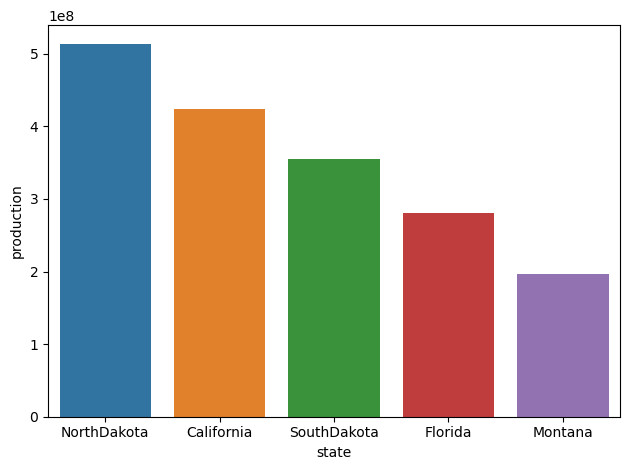

In [61]:
sns.barplot(data= g , x='state' , y='production')
plt.tight_layout()
plt.show()

##### Q3.What is the Change in mean Average price of Honey from 1995 to 2021?

In [65]:
g1 = df.groupby('year').mean(['average_price']).reset_index()
g1

,year,colonies_number,HoneyBee_yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


In [67]:
# The diff btw year 1995 & 2021 avg mean
74.840909 - 3.334250

71.506659

##### Q4.Which was the year when production of Honey in wholeUS was the highest?

In [81]:
g2 = df.groupby('year').sum()['production'].reset_index().sort_values(by='production', ascending=False)
g2.head(1)

,year,production
5,2000,220320000


<function matplotlib.pyplot.show(close=None, block=None)>

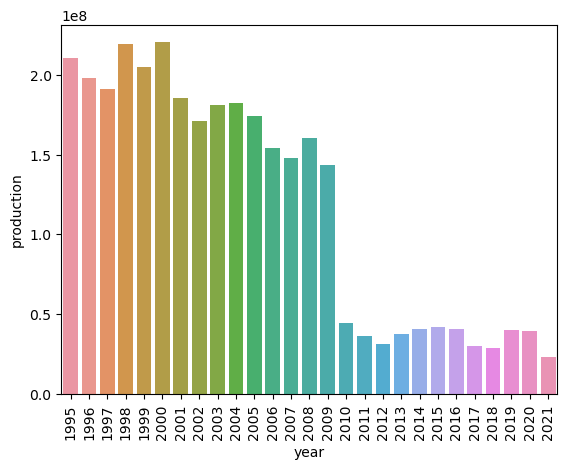

In [86]:
sns.barplot(x=g2['year'],y=g2['production']) 
plt.xticks(rotation=90)                   #figsize(length, height)
plt.show  

#### Q5.From the above inference we get the production was highest in the year 2000, 
now let 
infer which state was having highest contribution in that year

In [89]:
df2 = df[df['year']==2000]

In [94]:
df2.sort_values(by='production', ascending=False).head(1)

,state,colonies_number,HoneyBee_yield_per_colony,production,stocks,average_price,value_of_production,year
245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000


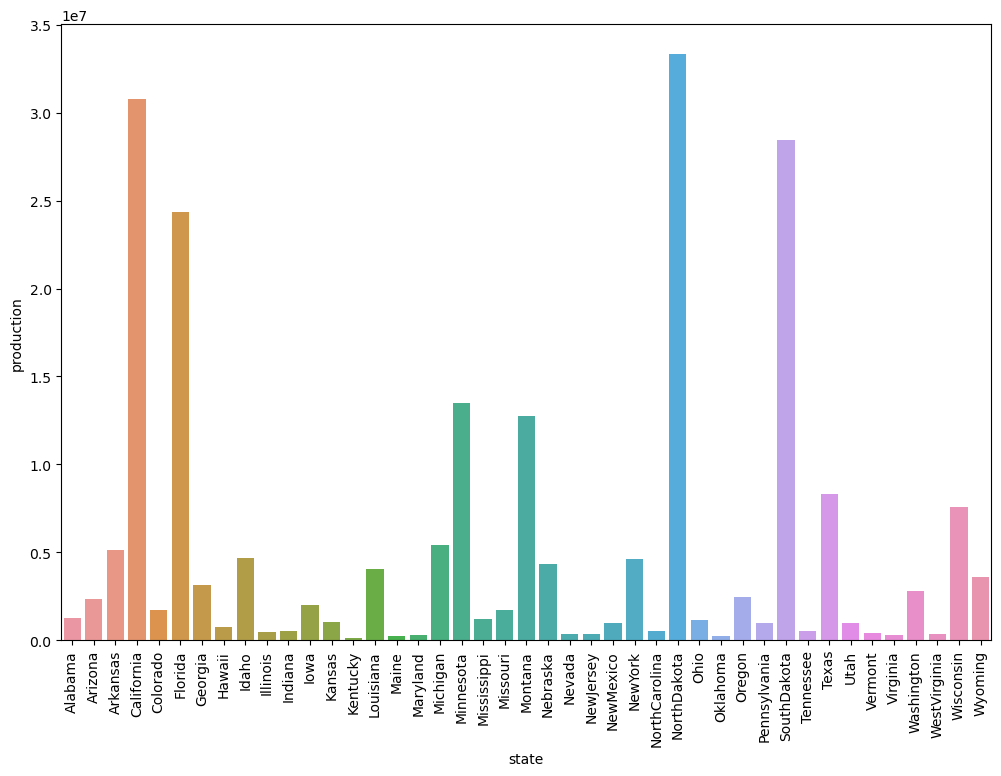

In [102]:
plt.figure(figsize=(12,8))
sns.barplot(x=df2['state'] , y=df2['production'])

plt.xticks(rotation=90)
plt.show()

##### Q6.Which states have the highest no. of colonies in the year 2000?

In [95]:
df2.sort_values(by='colonies_number', ascending=False).head(1)

,state,colonies_number,HoneyBee_yield_per_colony,production,stocks,average_price,value_of_production,year
220,California,440000,70,30800000,11396000,58.0,17864000,2000


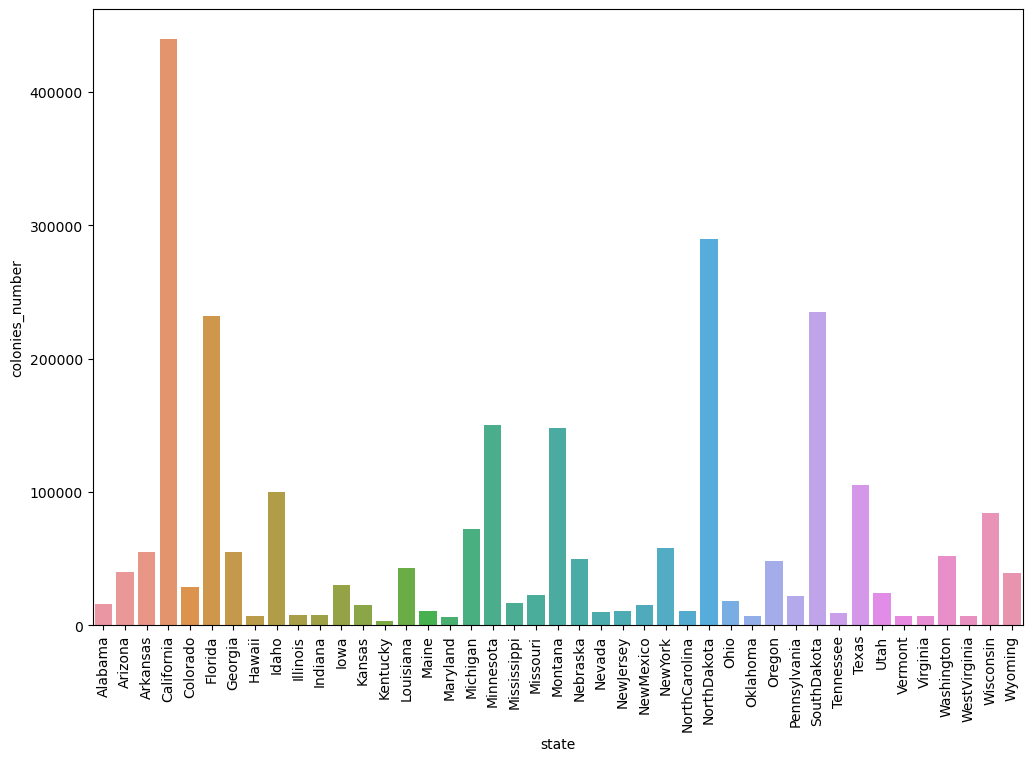

In [103]:
plt.figure(figsize=(12,8))
sns.barplot(x=df2['state'] , y=df2['colonies_number'])

plt.xticks(rotation=90)
plt.show()